In [2]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def find_number_plate(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use edge detection to find potential contours
    # Edges are where there is a sudden change in brightness or color
    # Change range is provided as 50 - 150.
    # More smaller the value output becomes noisy.
    # More higher the value output becomes too strict as it could miss some
    # edges. Hence, start with a mid value like 50 and experiment.
    edges = cv2.Canny(blurred, 50, 450)

    # Find contours in the edge-detected image. It`s like connecting the edges
    # located by the Canny to come up with a closed surface area.
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to find potential number plate region.
    # Check and track cordinates of the closed regions ,approximating with
    # a size of a number plate.
    potential_plates = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if 1000 < area < 50000:  # Adjust these thresholds based on your specific images
            potential_plates.append(contour)

    # Draw the potential plates on a copy of the original image
    plate_img = img.copy()
    cv2.drawContours(plate_img, potential_plates, -1, (0, 255, 0), 2)

    # Display the image with potential plates
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Potential Number Plates")
    plt.axis('off')
    plt.show()

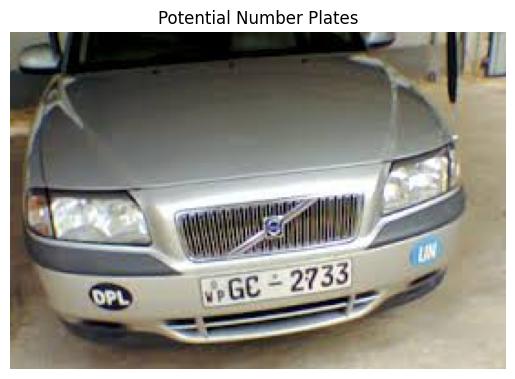

In [4]:
# Example usage
image_path = 'vehicle_2.jpg'
find_number_plate(image_path)